In [51]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

X.shape: (26, 2)


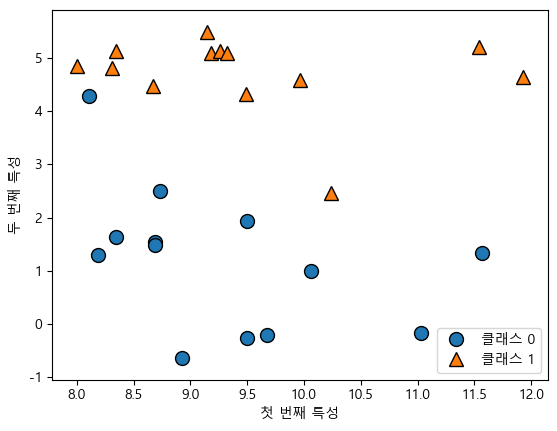

In [52]:
x, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", x.shape)
plt.show()

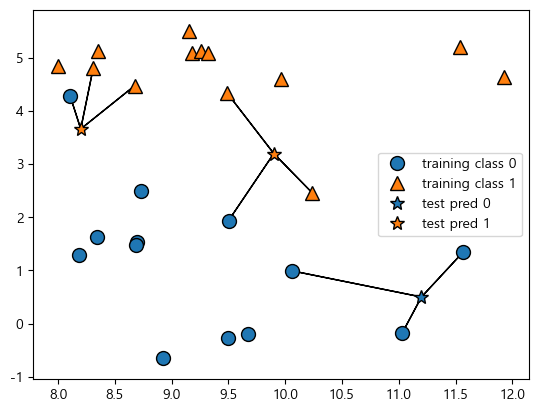

In [53]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
# mglearn.plots.plot_knn_classification(n_neighbors=1)

In [54]:
x, y = mglearn.datasets.make_forge()
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
print('테스트 세트 예측 :', model.predict(x_test))
print('테스트 세트 정확도 : {:.2f}'.format(model.score(x_test, y_test)))

테스트 세트 예측 : [1 0 1 0 1 0 0]
테스트 세트 정확도 : 0.86


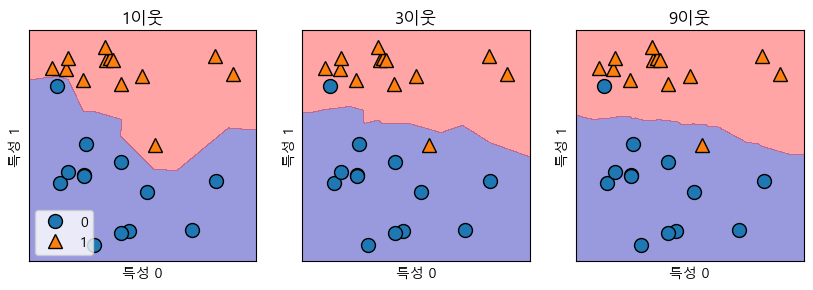

In [57]:
gif, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes) :
    
    model = KNeighborsClassifier(n_neighbors= n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(model, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:,0], x[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

min-max scaler

In [58]:
data = [1,2,3,4,5,6,7,8,9,10,25,77,38.5]

In [59]:
small = min(data)
big = max(data)

def min_max_scaler(number):
    result = round((number-small)/(big-small), 8)
    return result

apply_data = [min_max_scaler(n) for n in data]
apply_data

[0.0,
 0.01315789,
 0.02631579,
 0.03947368,
 0.05263158,
 0.06578947,
 0.07894737,
 0.09210526,
 0.10526316,
 0.11842105,
 0.31578947,
 1.0,
 0.49342105]

In [60]:
from sklearn.preprocessing import MinMaxScaler
data = np.array(data)
scaler = MinMaxScaler()
scaler.fit(data.reshape(-1, 1))
scaled_data = scaler.transform(data.reshape(-1,1))
print(scaled_data)

[[0.        ]
 [0.01315789]
 [0.02631579]
 [0.03947368]
 [0.05263158]
 [0.06578947]
 [0.07894737]
 [0.09210526]
 [0.10526316]
 [0.11842105]
 [0.31578947]
 [1.        ]
 [0.49342105]]


In [61]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [62]:
data = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
target = pd.DataFrame(cancer["target"], columns=["target"])
can = pd.concat([data,target], axis = 1)

can.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [63]:
# 모든 요인을 feature로 설정함.

x_train, x_test, y_train, y_test = train_test_split(can[cancer["feature_names"]],can["target"], random_state=0, stratify=cancer.target)

In [64]:
from tqdm import tqdm

100%|██████████| 15/15 [00:00<00:00, 84.18it/s]


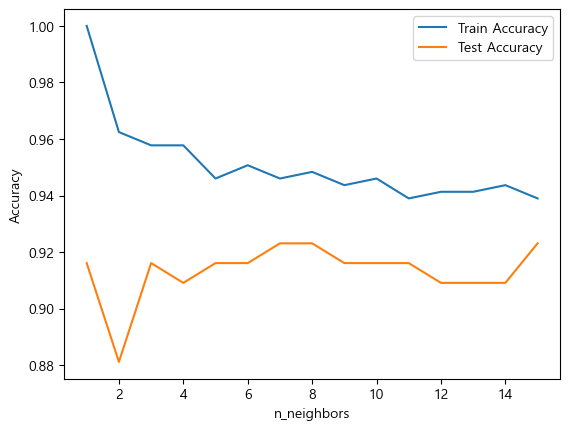

In [65]:
train_acc = []
test_acc = []
for i in tqdm(range(1, 16)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    
    train_acc.append(model.score(x_train, y_train))
    test_acc.append(model.score(x_test, y_test))
    
plt.plot(range(1,16), train_acc, label = "Train Accuracy")
plt.plot(range(1,16), test_acc, label = "Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [118]:
train_acc = []
test_acc = []
distance = []
best_distance = 0
a = []

def dis(num1, num2):
    result = abs(num1-num2)
    return result

for i in tqdm(range(1, 16)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    
    train_acc.append(model.score(x_train, y_train))
    test_acc.append(model.score(x_test, y_test))
    
for n in tqdm(range(14)):
    a = dis(train_acc[n], test_acc[n])
    distance.append(a)

for a in range(14):
    if distance[a] == 0.02288322006631871:
        print(a)
    
    
# len(distance)
for k in range(14):
    if train_acc[k] > train_acc[10]:
        print(train_acc[k])
    

# distance = [dis(train_acc[i], test_acc[i]) for i in range(14)]
# for i in range(14):
#     if distance[i]==min(distance):
#         print(i)
        
# for 

100%|██████████| 14/14 [00:00<?, ?it/s]

10
1.0
0.9624413145539906
0.9577464788732394
0.9577464788732394
0.9460093896713615
0.9507042253521126
0.9460093896713615
0.9483568075117371
0.9436619718309859
0.9460093896713615
0.9413145539906104
0.9413145539906104
0.9436619718309859


In [94]:
best_train_acc = 0
best_test_acc = 0
best_k = 0

for i in tqdm(range(1, 16)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    # 가장 큰 test_acc를 찾아서 그 때의 train과 test를 각각 찾아준다.
    if best_test_acc < test_acc:
        best_test_acc = test_acc
        best_train_acc = train_acc
        best_k = i
        
    # 가장 큰 test_acc
    elif best_test_acc == test_acc:
        if abs(best_train_acc - best_test_acc) > abs(train_acc - test_acc):
            best_test_acc = test_acc
            best_train_acc = train_acc
            best_k = i
        else:
            pass
    else:
        pass
print(best_k)

100%|██████████| 15/15 [00:00<00:00, 85.30it/s]

15


In [92]:
distance[6]

0.022932466594438372